# Assaignment 2 Diabetes classification. By group 16

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data= pd.read_csv("diabetes_binary_classification_data.csv")

##  Over view

In [3]:
##Checks whats in the dataset
data.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [4]:
# Gets information about tables columns min and max values and so on
data.describe()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.139333,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.346294,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [5]:
#displays the columns
data.columns

Index(['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [6]:
#Tells me how many null values in the dataset
#There is 253680 are non-null, thats the amount of columns. So there is no null
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [7]:
#verify there is no null values
#isna sums the nul values
data.isna().sum()

Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [8]:
#checks duplicated in dataset
# There is 24206 duplicates
data.duplicated().sum()

np.int64(24206)

In [9]:
# Now the sample size is 229474
data.describe()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.139333,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.346294,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


## Data visualization

In [10]:
# Count for all binary values
binary_columns = ['Diabetes_binary','GenHlth', 'Education', 'HighBP', 'HighChol', 'CholCheck', 
                        'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 
                        'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 
                        'NoDocbcCost', 'DiffWalk', 'Sex']  # Replace with your actual column names

# Loop through each binary column and print the counts
for column in binary_columns:
    print(f"Counts for {column}:")
    print(data[column].value_counts())
    print("\n")  # Add a newline for better readability

Counts for Diabetes_binary:
Diabetes_binary
0.0    218334
1.0     35346
Name: count, dtype: int64


Counts for GenHlth:
GenHlth
2.0    89084
3.0    75646
1.0    45299
4.0    31570
5.0    12081
Name: count, dtype: int64


Counts for Education:
Education
6.0    107325
5.0     69910
4.0     62750
3.0      9478
2.0      4043
1.0       174
Name: count, dtype: int64


Counts for HighBP:
HighBP
0.0    144851
1.0    108829
Name: count, dtype: int64


Counts for HighChol:
HighChol
0.0    146089
1.0    107591
Name: count, dtype: int64


Counts for CholCheck:
CholCheck
1.0    244210
0.0      9470
Name: count, dtype: int64


Counts for Smoker:
Smoker
0.0    141257
1.0    112423
Name: count, dtype: int64


Counts for Stroke:
Stroke
0.0    243388
1.0     10292
Name: count, dtype: int64


Counts for HeartDiseaseorAttack:
HeartDiseaseorAttack
0.0    229787
1.0     23893
Name: count, dtype: int64


Counts for PhysActivity:
PhysActivity
1.0    191920
0.0     61760
Name: count, dtype: int64


Counts for 

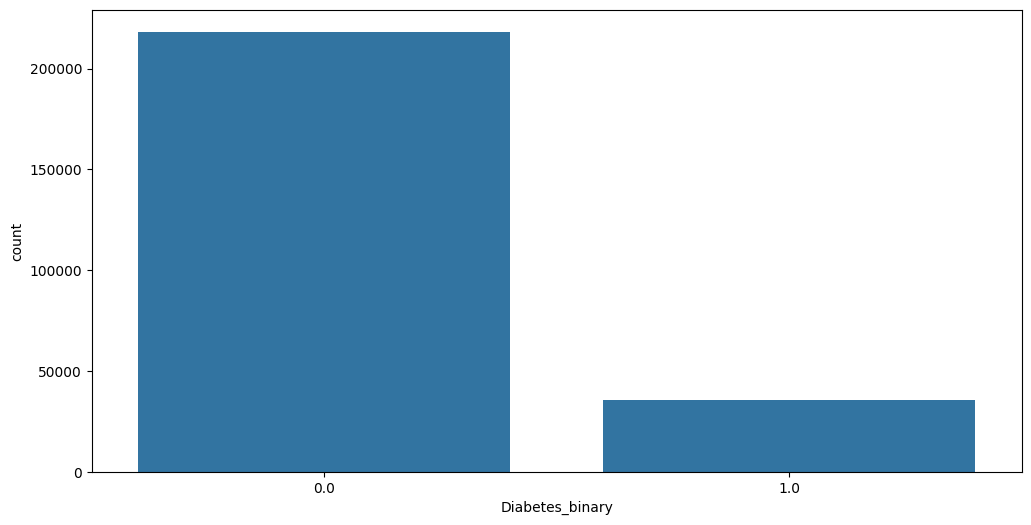

In [11]:
# Figure to see how many don't have diabetes compered with how many has
plt.figure(figsize = (12,6)) # x and y values
sns.countplot(x = 'Diabetes_binary', data = data) # Show how many has diabetes and how many dont
plt.show()

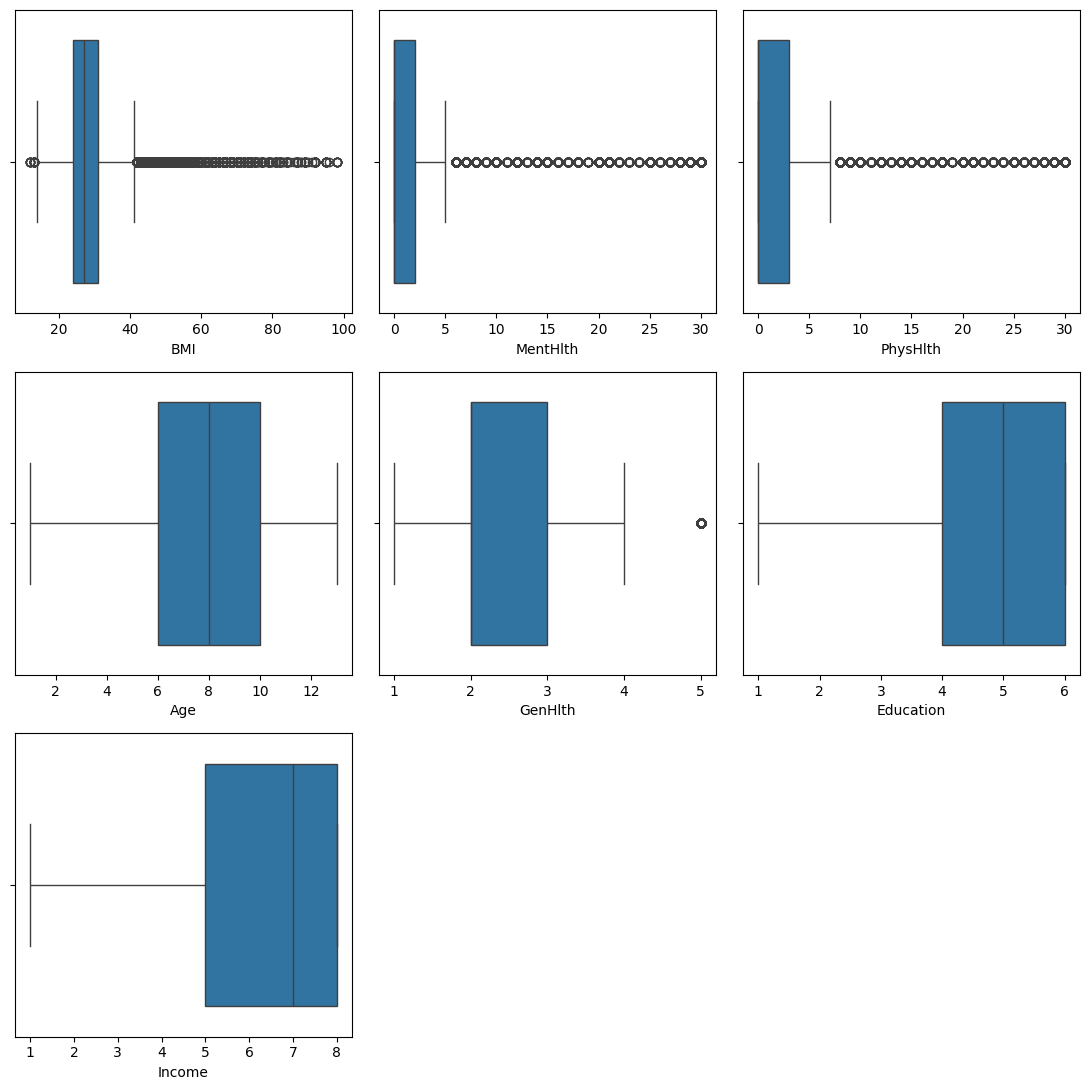

In [12]:
#Observing Outliers
#Outclass is the un-expected values
plt.figure(figsize = (11,11))
for i, col in enumerate(['BMI', 'MentHlth', 'PhysHlth', 'Age','GenHlth','Education','Income']):
    plt.subplot(3,3, i+1) # (y,x) shows how many is in y and how many in x
    sns.boxplot(x = col, data = data)

    # Adjust layout to avoid overlapping subplots
plt.tight_layout()
plt.show()

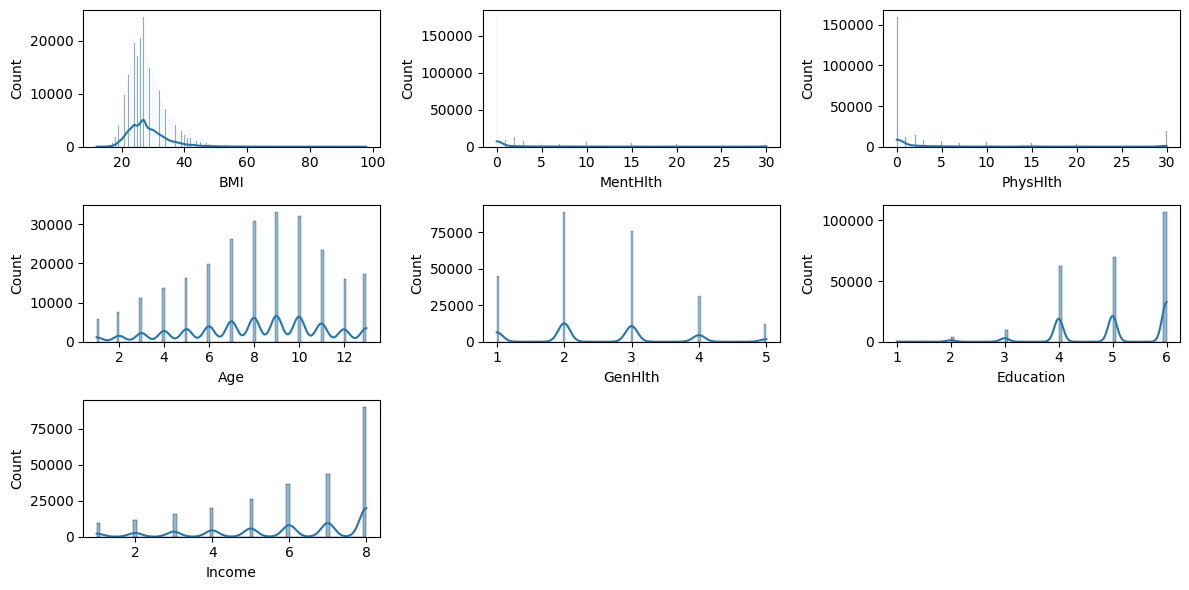

In [13]:
#Histplot
# Show how many from what group contended in the survey
plt.figure(figsize = (12,6))
for i, col in enumerate(['BMI', 'MentHlth', 'PhysHlth', 'Age','GenHlth','Education', 'Income']):
    plt.subplot(3,3, i+1) # (y,x) shows how many is in y and how many in x
    sns.histplot(x = col, data = data, kde = True)

    # Adjust layout to avoid overlapping subplots
plt.tight_layout()
plt.show()

## Correlation

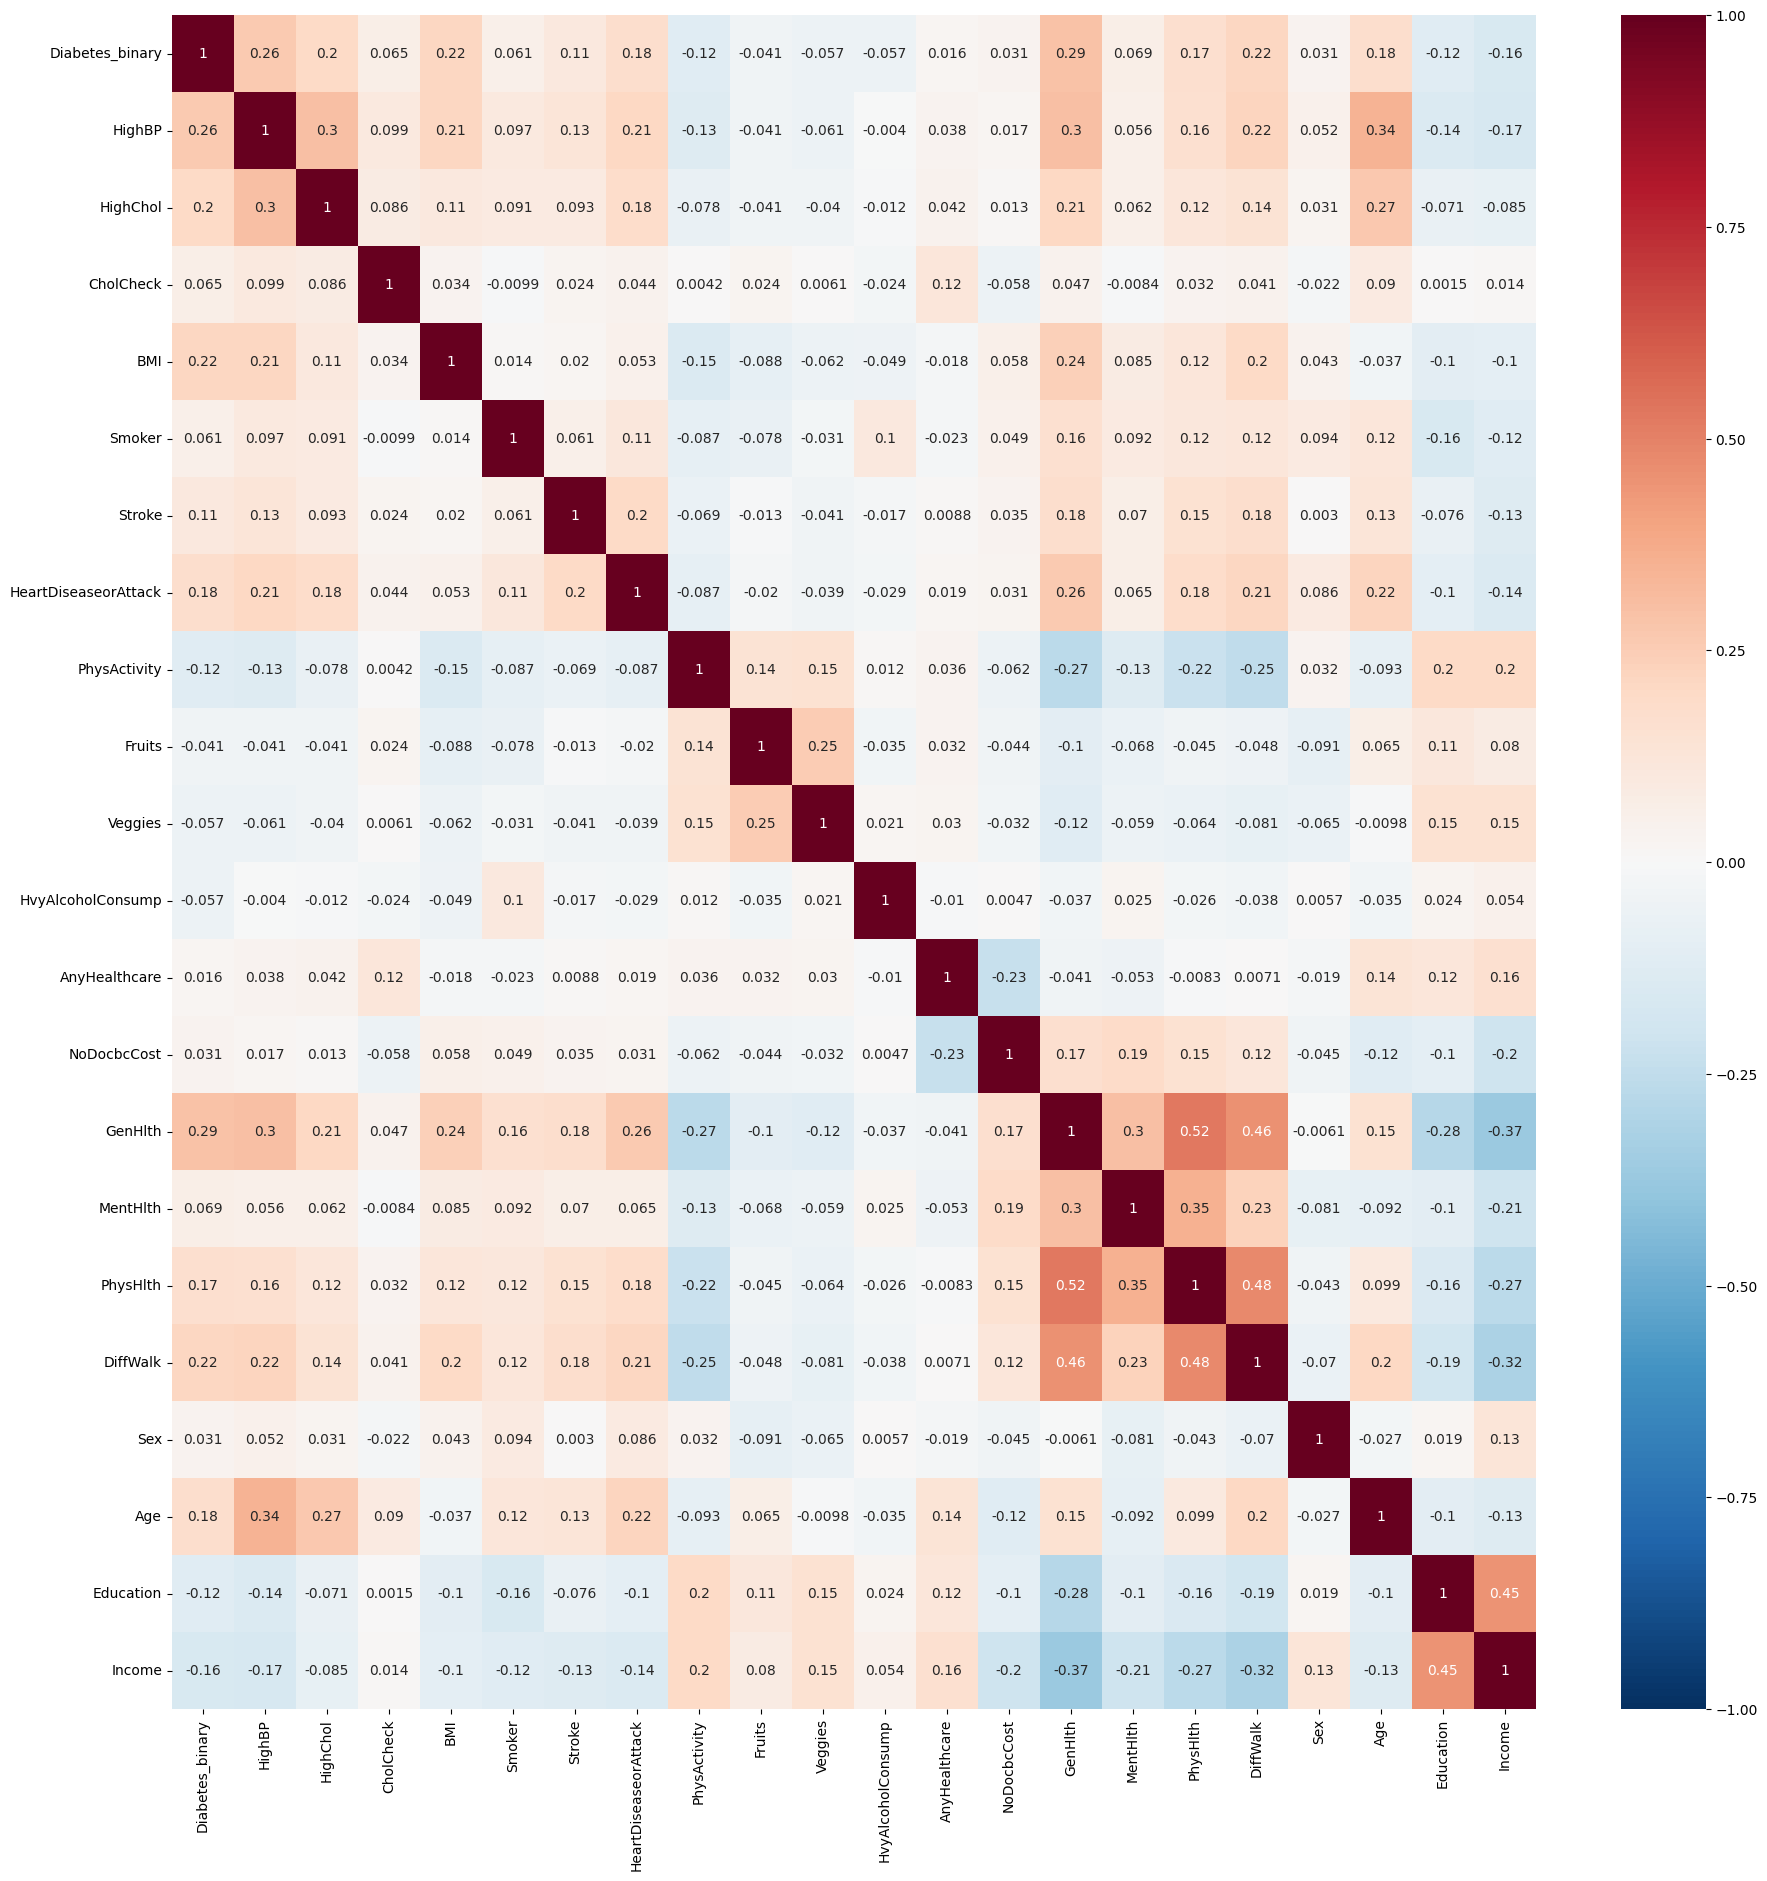

In [14]:
# This is correlation map before pre processing
# heat map

# Correlation heatmap
plt.figure(figsize=(22, 22)) # 22,22 because thats the amount of titles we have
# vmin is minimum value, cmap is the color map That adds the colors. Anotations show the value
sns.heatmap(data.corr(), vmin=-1.0, center=0, cmap='RdBu_r', annot=True)
plt.show()

In [15]:
# Perform correlation analysis
correlation_matrix = data.corr()
sorted_correlations = correlation_matrix['Diabetes_binary'].sort_values(ascending=False)

print("Top correlations with Diabetes_binary:")
print(sorted_correlations)

Top correlations with Diabetes_binary:
Diabetes_binary         1.000000
GenHlth                 0.293569
HighBP                  0.263129
DiffWalk                0.218344
BMI                     0.216843
HighChol                0.200276
Age                     0.177442
HeartDiseaseorAttack    0.177282
PhysHlth                0.171337
Stroke                  0.105816
MentHlth                0.069315
CholCheck               0.064761
Smoker                  0.060789
NoDocbcCost             0.031433
Sex                     0.031430
AnyHealthcare           0.016255
Fruits                 -0.040779
Veggies                -0.056584
HvyAlcoholConsump      -0.057056
PhysActivity           -0.118133
Education              -0.124456
Income                 -0.163919
Name: Diabetes_binary, dtype: float64


## PreProccesing